# Microplastics in Marine Body 🌊

## What are microplastics?
Microplastics are the breakdown of larger plastics, which become tiny particles mainly less than 5mm in length. 

These are generally found in soils, water bodies and also in human bodies. These mainly occur in the environment due to inefficient way of disposing the consumer plastic units.

When plastics get recycled, the end products which retained out with the disposed water is not treated properly at the waste water treatment plant or even if it is treated a minute percentage of microplastics stay dissolved with the water. And this water when released out to the water bodies, the water, the soil, crops, human beings; all comes in the contact of the contamination. 

Scientists have found these tiny bits of degraded plastic—along with fibers shed from synthetic fabric, and microbeads from cosmetics—lurking throughout the oceans, lakes, soil and even the air. Creatures from plankton to earthworms to humans are eating them, posing a potentially serious health threat to animals and ecosystems. The problem is only expected to balloon as plastic production increases exponentially—from a mere two million metric tons annually in 1950 to more than 300 million metric tons today, and a projected 33 billion metric tons each year by 2050.

To prevent it from happening, we can commercially use single-use plastics and material scientists are also developing alternatives of plastics and lookalike plastics but they are also not even close enough to give 100% recyclability and end up in the nature in one or other way. 

Here, in this exploratory data analysis we will look into National Oceanic and Atmospheric Adminstration's (NOAA) marine microplastics data to know and understand microplastics, their growth rate with respect to various ocean bodies in our planet earth.

In [ ]:
# Import packages
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
import csv
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
# For files upload
data = files.upload()

Saving DataRecords.csv to DataRecords.csv


In [ ]:
# Creating a dataframe
marine = pd.read_csv(io.StringIO(data['DataRecords.csv'].decode('utf-8')), parse_dates = ['Date'])

### First we will manually analyse the csv file to know which columns should we keep and which columns we should remove. Then we will print the column names and decide which one to remove and changes for any further modification. 

In [ ]:
# To check the column names of the dataframe
for col_names in marine.columns:
  print(col_names)

FID
Date
Latitude
Longitude
Oceans
Regions
SubRegions
Microplastics Measurement (density)
Unit
Density Class Range
Density Class
Sampling Method
Short Reference
Long Reference
DOI
Organization
Keywords
NCEI Accession Number
NCEI Accession Link
x
y


### From the above results, we will remove all the columns which are not required. x, y, NCEI Accession Link, NCEI Accession Number, keywords (it is same as organization), DOI and make FID as index.

In [ ]:
# Remove specific columns
marine = marine.drop(['DOI', 'Keywords', 'NCEI Accession Number', 'NCEI Accession Link', 'x', 'y'], axis = 1) 

In [ ]:
# Set FID as index
marine = marine.set_index('FID')

# Challenges 💪
1.   What is the average microplastics measurement in all the oceans? Calculate their minimum and maximum values.
2.   Which categories do oceans fall in? 🌊
3.   Does blue planet really hold its status? 🌎
4.   Different approach different measurement 📏
5.   Are we really curbing the dispose of microplastics into the ocean?🌊

# 1.    What is the average microplastics measurement in all the oceans? Calculate their minimum and maximum values.

*   First, we will extract out the names of the oceans from csv.
*   Then, find the mean of microplastics present in all the oceans.   

In [ ]:
# Check the names of oceans in dataset
for names in marine['Oceans'].unique():
  print(names)

Atlantic Ocean
Pacific Ocean
Indian Ocean
Southern Ocean
Arctic Ocean


In [9]:
avg_microplastics = marine.groupby(['Oceans'])[['Microplastics Measurement (density)']].mean().round(4).sort_values('Microplastics Measurement (density)')
avg_microplastics

,Microplastics Measurement (density)
Oceans,
Southern Ocean,0.0108
Arctic Ocean,0.0557
Atlantic Ocean,0.3094
Pacific Ocean,0.7825
Indian Ocean,1.3769


**From the above analysis we found that, Southern Ocean has the lowest microplastics measurement in its water, where as Indian Ocean is 128 % more polluted with microplastics.**

# 2.    Which categories do oceans fall in? 🌊

*   First, we will check the density class categories of oceans depending upon microplastics measurement
*   Then we will create a list of conditions on density class and then append it to the previous table.



In [10]:
for names in marine['Density Class'].unique():
  print(names)

Low : 0.0005-0.005 pieces/m³
Medium : 0.005-1 pieces/m³
Very Low: Less than 0.0005 pieces/m³
High : 1-10 pieces/m³
Very High : Greater than 10 pieces/m³


In [11]:
# create a list of our conditions
density_range = [
    (avg_microplastics['Microplastics Measurement (density)'] > 0.0005) & (avg_microplastics['Microplastics Measurement (density)'] < 0.005),   #Low
    (avg_microplastics['Microplastics Measurement (density)'] > 0.005) & (avg_microplastics['Microplastics Measurement (density)'] < 1),   # medium
    (avg_microplastics['Microplastics Measurement (density)'] < 0.0005), # very low
    (avg_microplastics['Microplastics Measurement (density)'] > 1) & (avg_microplastics['Microplastics Measurement (density)'] < 10),   #High
    (avg_microplastics['Microplastics Measurement (density)'] > 10) # very high
    ]

# create a list of the values we want to assign for each condition
density_class = ['Low', 'Medium', 'Very Low', 'High', 'Very High']

# create a new column and use np.select to assign values to it using our lists as arguments
avg_microplastics['Density Class'] = np.select(density_range, density_class)

# display updated DataFrame
avg_microplastics

,Microplastics Measurement (density),Density Class
Oceans,,
Southern Ocean,0.0108,Medium
Arctic Ocean,0.0557,Medium
Atlantic Ocean,0.3094,Medium
Pacific Ocean,0.7825,Medium
Indian Ocean,1.3769,High


**It shows that, all the oceans come under *Medium* density class ranging between 0.005 - 1 pieces/m3 rather than Indian Ocean which has a *High* density class ranging between 1 - 10 pieces/m3.**

# 3.    Does blue planet really hold its status? 🌎

In [12]:
total_microplastics = marine[['Microplastics Measurement (density)']].mean()
print(total_microplastics)

Microplastics Measurement (density)    0.467347
dtype: float64


From this analysis, we found that even if world's microplastics measurement is in Medium density class but if we check with respect to different oceans, we can see the broader picture that, blue planet is getting polluted. 

And we being the care taker of our home need to reduce the use of plastics, develop new material technology for it's alternatives.

LET'S HOLD THE STATUS OF EARTH AND NOT LET IT POLLUTE!!!

# 4.    Different approach different measurement📏

*   First, we will know about the sampling method categories to measure microplastics in ocean.
*   Then we will group the dataset on the basis of sampling method and oceans and calculate the mean microplastics in each ocean.

In [13]:
for names in marine['Sampling Method'].unique():
  print(names)

Neuston net
Grab sample
Intake seawater
Manta net


In [14]:
sampling_microplastics = marine.groupby(['Sampling Method', 'Oceans'])[['Microplastics Measurement (density)']].mean().round(4).sort_values('Sampling Method')
sampling_microplastics


Microplastics Measurement (density)
Sampling Method Oceans                                             
Grab sample     Arctic Ocean                                 0.0557
                Atlantic Ocean                               0.0141
                Indian Ocean                                 0.0057
                Pacific Ocean                                0.0074
                Southern Ocean                               0.0177
Intake seawater Atlantic Ocean                              31.4138
                Indian Ocean                                24.8571
                Pacific Ocean                               71.3200
Manta net       Atlantic Ocean                               0.4103
                Indian Ocean                                 0.0344
                Pacific Ocean                                1.8451
Neuston net     Atlantic Ocean                               0.0622
                Indian Ocean                                 0.0154
                Pacific Ocean                                0.1145
                Southern Ocean                               0.0012

### Visualizing the data 📈

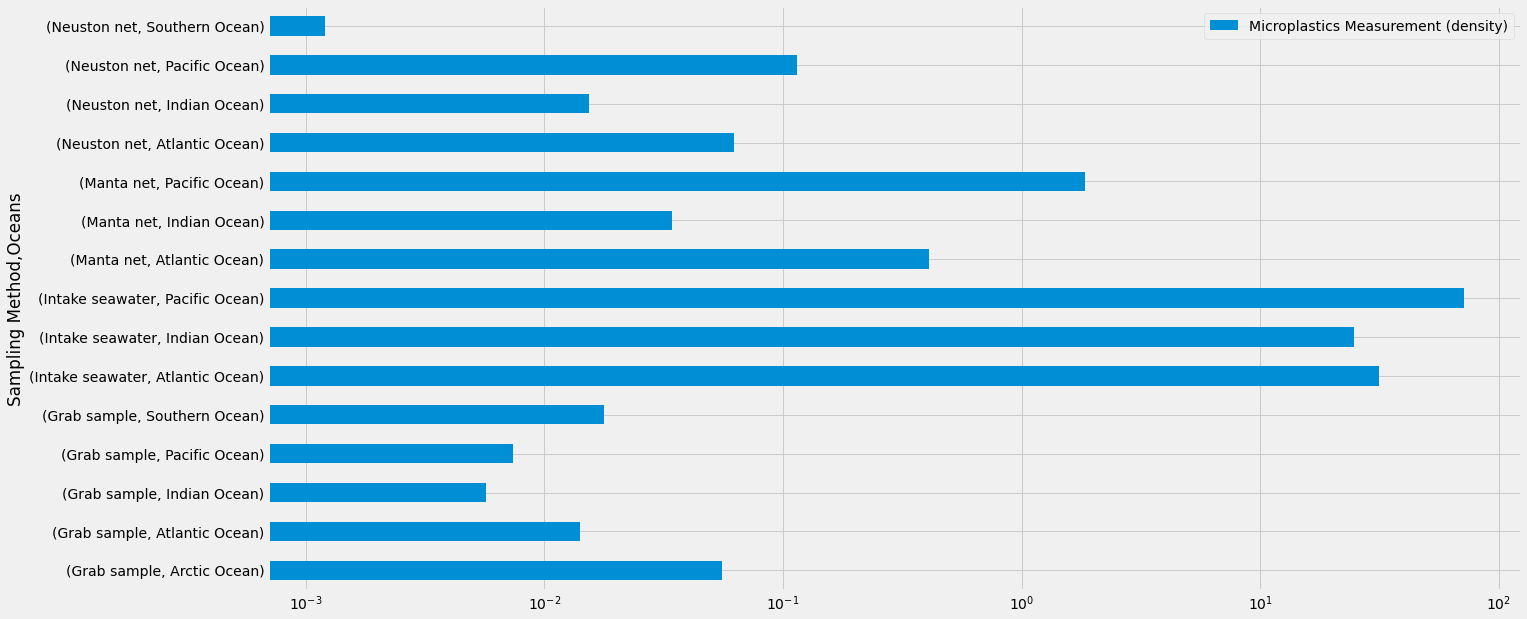

In [15]:
sampling_microplastics.plot(kind = 'barh', logx = True, figsize = (20,10))
plt.show()

**From the above analysis,we concluded that every method outputs different measurement theories. So, we need more insights about the dataset to clearly reach near a conclusion to know which one is the best method to measure microplastics from marine bodies.**

# 5.    Are we really curbing the dispose of microplastics into the ocean? 🌊

Here, we will group microplastics measurement on the basis of year and plot them into a line plot.

In [16]:
microplastics_rate = marine.groupby(marine.Date.dt.year)['Microplastics Measurement (density)'].mean()

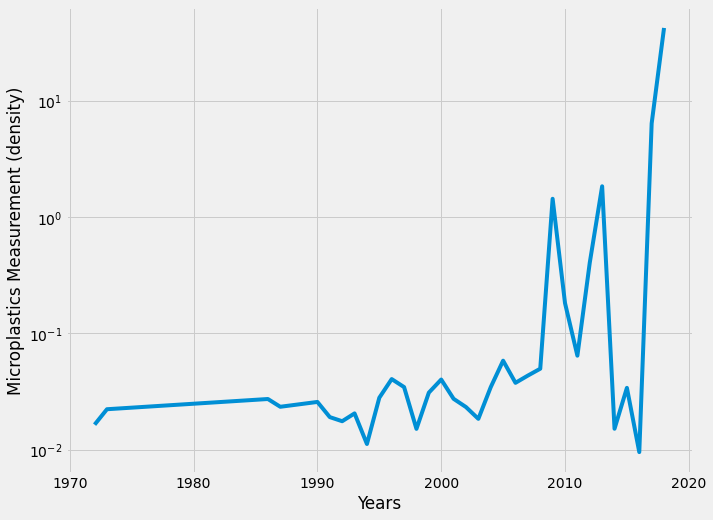

In [17]:
microplastics_rate.plot(kind = 'line', logy = True, figsize = (10,8), xlabel = 'Years', ylabel = 'Microplastics Measurement (density)')

**From the above visualization, we can easily see that the contamination of oceans with plastics has sky rocketed.**

**This line plot may go up higher with the coming years. As long as we are using plastics and there is a production of plastice without a proper disposal technique, we are not saved.**

# SAY NO TO PLASTIC!!!
# SAVE EARTH 🌎, SAVE HUMANS 🧍